# ЗАДАНИЕ 2. ПРЕОБРАЗОВАНИЕ И АНАЛИЗ ДИНАМИКИ ВРЕМЕННОГО РЯДА

Измените частоту представления данных по ценам на материал 1 в большую и в меньшую сторону, воспользуйтесь основными аналитическими характеристиками динамики для анализа и прогнозирования временного ряда.

# Раздел 1. Изменение частоты представления данных и интерполяция

Прочитаем данные по ценам на материал 1 и приведем их к виду, пригодному для дальнейшего анализа.

In [1]:
!pip install --upgrade xlrd

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('data.xls', sheet_name='Material 1')
data.head()

,Unnamed: 0,Unnamed: 1,Рыночные цены на материал 1 (руб.),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,NaN,NaN,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,...,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00
1,№ организации,1.0,26.45,23.89,25.95,30.03,28.96,25.58,25.96,30.56,...,37.36,39.21,39.43,43.5,40.75,42.84,38.01,45.18,42.49,44.2
2,NaN,2.0,26.09,20.66,22.6,25.05,27.59,20.49,27.39,28.52,...,39.54,42.38,37.5,41.29,44.96,45.39,42.49,45.77,46.94,40.83
3,NaN,3.0,22.05,23.15,28.22,21.55,21.57,28.58,31.42,28.11,...,40.17,47.99,47.92,46.25,47.3,48.9,51.2,43.96,49.22,51.38
4,NaN,4.0,20.41,28.39,17.74,18.46,20.47,28.93,27.89,20.68,...,68.39,73.93,63.97,75.59,70.98,78.28,78.98,71.27,81.34,85.73


In [4]:
dates = data.loc[data.index == 0].values[0,2:]

In [5]:
val = data.loc[data.index == 54].values[0,2:]

In [6]:
data = {'Date':dates, 'Value':val}

In [7]:
df = pd.DataFrame(data)
df.head()

,Date,Value
0,2007-01-01,26.94
1,2007-02-01,22.48
2,2007-03-01,28.16
3,2007-04-01,20.62
4,2007-05-01,24.81


In [8]:
df = df.set_index('Date')
df.head(10)

,Value
Date,
2007-01-01,26.94
2007-02-01,22.48
2007-03-01,28.16
2007-04-01,20.62
2007-05-01,24.81
2007-06-01,31.57
2007-07-01,31.94
2007-08-01,30.57
2007-09-01,25.93


In [9]:
df.size

48

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   48 non-null     object
dtypes: object(1)
memory usage: 768.0+ bytes


In [11]:
df.Value = df.Value.astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


Убедимся в том, что работаем с объектом Series, а не DataFrame. Превратить таблицу с одним столбцом целевых значений в объект Series можно с помощью функции squeeze(). Дадим ему название series.

In [13]:
ser = df.squeeze()

In [14]:
type(ser)

pandas.core.series.Series

Перейдем к дневной разбивке данных, воспользовавшись функцией resample('D').mean(). Результат запишем в переменную upsampled. Выведем на экран первые 32 наблюдения, воспользовавшись функцией head().

In [15]:
upsampled = ser.resample('D').mean()
print(upsampled.head(32))

Date
2007-01-01    26.94
2007-01-02      NaN
2007-01-03      NaN
2007-01-04      NaN
2007-01-05      NaN
2007-01-06      NaN
2007-01-07      NaN
2007-01-08      NaN
2007-01-09      NaN
2007-01-10      NaN
2007-01-11      NaN
2007-01-12      NaN
2007-01-13      NaN
2007-01-14      NaN
2007-01-15      NaN
2007-01-16      NaN
2007-01-17      NaN
2007-01-18      NaN
2007-01-19      NaN
2007-01-20      NaN
2007-01-21      NaN
2007-01-22      NaN
2007-01-23      NaN
2007-01-24      NaN
2007-01-25      NaN
2007-01-26      NaN
2007-01-27      NaN
2007-01-28      NaN
2007-01-29      NaN
2007-01-30      NaN
2007-01-31      NaN
2007-02-01    22.48
Freq: D, Name: Value, dtype: float64


Проведем интерполяцию данных на основе полинома 1-ой степени, воспользовавшись функцией interpolate(method='linear'). Результат запишем в переменную interpolated. Выведем на экран первые 32 наблюдения, воспользовавшись функцией head().

In [16]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))

Date
2007-01-01    26.940000
2007-01-02    26.796129
2007-01-03    26.652258
2007-01-04    26.508387
2007-01-05    26.364516
2007-01-06    26.220645
2007-01-07    26.076774
2007-01-08    25.932903
2007-01-09    25.789032
2007-01-10    25.645161
2007-01-11    25.501290
2007-01-12    25.357419
2007-01-13    25.213548
2007-01-14    25.069677
2007-01-15    24.925806
2007-01-16    24.781935
2007-01-17    24.638065
2007-01-18    24.494194
2007-01-19    24.350323
2007-01-20    24.206452
2007-01-21    24.062581
2007-01-22    23.918710
2007-01-23    23.774839
2007-01-24    23.630968
2007-01-25    23.487097
2007-01-26    23.343226
2007-01-27    23.199355
2007-01-28    23.055484
2007-01-29    22.911613
2007-01-30    22.767742
2007-01-31    22.623871
2007-02-01    22.480000
Freq: D, Name: Value, dtype: float64


Построим для интерполированного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.

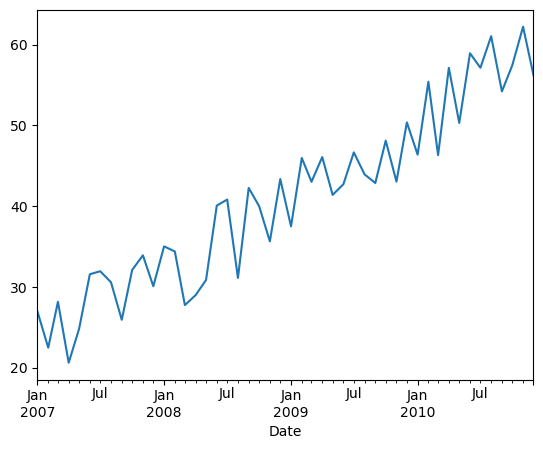

In [17]:
interpolated.plot()
plt.show()

Проведем интерполяцию данных на основе полинома 2-ой степени, воспользовавшись функцией interpolate(method='spline', order=2). Результат запишем в переменную interpolated. Выведем на экран первые 32 наблюдения, воспользовавшись функцией head().

In [18]:
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))

Date
2007-01-01    26.940000
2007-01-02    26.480712
2007-01-03    26.196172
2007-01-04    25.923743
2007-01-05    25.663424
2007-01-06    25.415216
2007-01-07    25.179118
2007-01-08    24.955130
2007-01-09    24.743252
2007-01-10    24.543485
2007-01-11    24.355828
2007-01-12    24.180281
2007-01-13    24.016845
2007-01-14    23.865519
2007-01-15    23.726303
2007-01-16    23.599197
2007-01-17    23.484202
2007-01-18    23.381317
2007-01-19    23.290542
2007-01-20    23.211878
2007-01-21    23.145324
2007-01-22    23.090880
2007-01-23    23.048547
2007-01-24    23.018323
2007-01-25    23.000211
2007-01-26    22.994208
2007-01-27    23.000316
2007-01-28    23.018534
2007-01-29    23.048862
2007-01-30    23.091301
2007-01-31    23.145849
2007-02-01    22.480000
Freq: D, Name: Value, dtype: float64


Построим для интерполированного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.

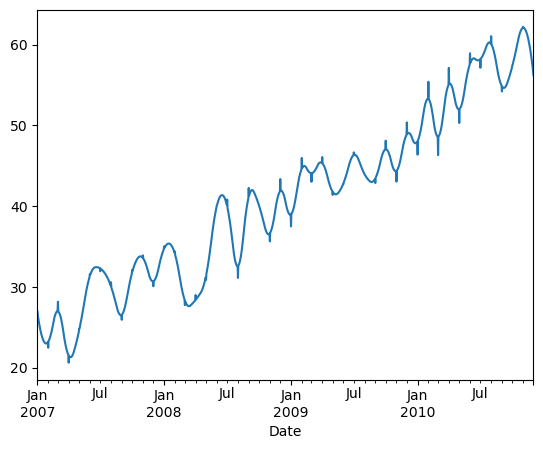

In [19]:
interpolated.plot()
plt.show()

Перейдем к квартальной разбивке данных для 2007 года, воспользовавшись функцией resample('Q'). Результат запишем в переменную resample. Для каждого квартала найдем среднеквартальное значение цены на материал 1, воспользовавшись функцией mean(). Результат запишем в переменную q_mean. Выведем на экран первые 5 наблюдений, воспользовавшись функцией head().

In [20]:
resample = ser.resample('Q')

In [21]:
q_mean = resample.mean()

In [22]:
print(q_mean.head())

Date
2007-03-31    25.860000
2007-06-30    25.666667
2007-09-30    29.480000
2007-12-31    32.030000
2008-03-31    32.386667
Freq: Q-DEC, Name: Value, dtype: float64


Построим для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.

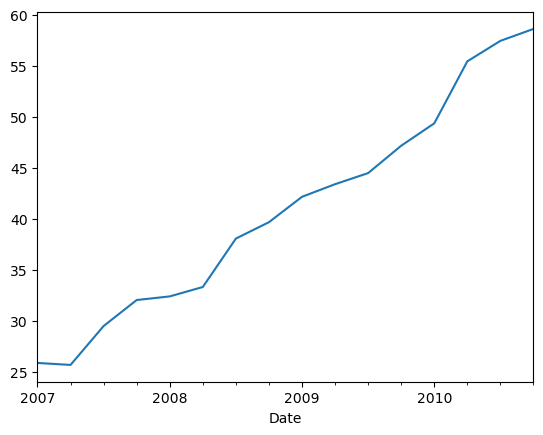

In [23]:
q_mean.plot()
plt.show()

Перейдем к годовой разбивке данных, воспользовавшись функцией resample('A'). Результат запишем в переменную resample. Для каждого года найдем среднегодовое значение цены на материал 1, воспользовавшись функцией mean(). Результат запишем в переменную y_mean. Выведем на экран первые 5 наблюдений, воспользовавшись функцией head().

In [24]:
resample = ser.resample('A')

In [25]:
y_mean = resample.mean()

In [26]:
print(y_mean)

Date
2007-12-31    28.259167
2008-12-31    35.853333
2009-12-31    44.296667
2010-12-31    55.215000
Freq: A-DEC, Name: Value, dtype: float64


Построим для преобразованного ряда линейный график, воспользовавшись функцией plot(), а также функцией show() из модуля matplotlib.pyplot.

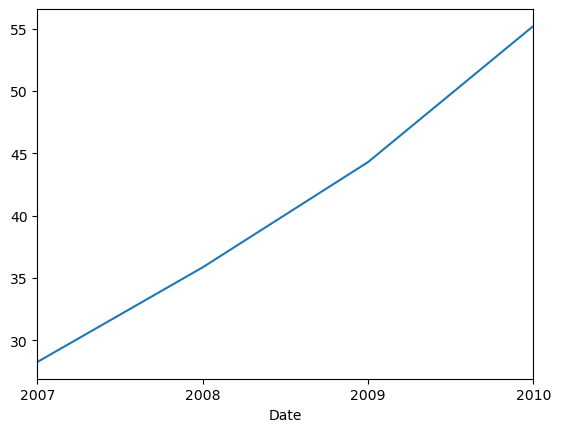

In [27]:
y_mean.plot()
plt.show()

# Раздел 2. Анализ динамики и прогнозирование временного ряда

Построим таблицу данных на основе значений среднегодовой цены на материал 1 (y_mean.values), воспользовавшись функцией DataFrame() из модуля pandas. Результат запишем в переменную temps. 

In [28]:
temps = pd.DataFrame(y_mean.values)

In [29]:
temps

,0
0,28.259167
1,35.853333
2,44.296667
3,55.215000


Поместим в переменную df исходный ряд и сдвинутый на 1 шаг, воспользовавшись функцией concat([values.shift(1), values], axis=1) из модуля pandas. Дадим полученным столбцам названия 't' и 't+1', воспользовавшись следующей командой: df.columns = ['t', 't+1']. Выведем на экран первые 5 значений, воспользовавшись функцией head(). 

In [30]:
df = pd.concat([temps.shift(1), temps], axis=1)
df.columns = ['t-1', 't']
df

,t-1,t
0,NaN,28.259167
1,28.259167,35.853333
2,35.853333,44.296667
3,44.296667,55.215000


Рассчитаем на основе полученной таблицы среднегодовых значений цены на материал 1 основные показатели динамики за 4 года. 

Поместим в таблицу данных df столбцы с вычисленными значениями следующих показателей: 
1) абсолютный цепной прирост (Delta_t), 
2) абсолютный базисный прирост (Delta_0), 
3) цепной темп роста (Temp_t), 
4) базисный темп роста (Temp_0), 
5) цепной темп прироста (TDelta_t), 
6) базисный темп прироста (TDelta_0). 

В качестве базисного периода возьмем 2007 год.

In [31]:
df['Delta_t'] = df['t'] - df['t-1']
df

,t-1,t,Delta_t
0,NaN,28.259167,NaN
1,28.259167,35.853333,7.594167
2,35.853333,44.296667,8.443333
3,44.296667,55.215000,10.918333


In [32]:
df['Delta_0'] = df['t'] - df['t'][0]
df

,t-1,t,Delta_t,Delta_0
0,NaN,28.259167,NaN,0.000000
1,28.259167,35.853333,7.594167,7.594167
2,35.853333,44.296667,8.443333,16.037500
3,44.296667,55.215000,10.918333,26.955833


In [33]:
df['Temp_t'] = df['t'] / df['t-1']
df

,t-1,t,Delta_t,Delta_0,Temp_t
0,NaN,28.259167,NaN,0.000000,NaN
1,28.259167,35.853333,7.594167,7.594167,1.268733
2,35.853333,44.296667,8.443333,16.037500,1.235496
3,44.296667,55.215000,10.918333,26.955833,1.246482


In [34]:
df['Temp_0'] = df['t'] / df['t'][0]
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0
0,NaN,28.259167,NaN,0.000000,NaN,1.000000
1,28.259167,35.853333,7.594167,7.594167,1.268733,1.268733
2,35.853333,44.296667,8.443333,16.037500,1.235496,1.567515
3,44.296667,55.215000,10.918333,26.955833,1.246482,1.953879


In [35]:
df['TDelta_t'] = df['Temp_t'] - 1
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t
0,NaN,28.259167,NaN,0.000000,NaN,1.000000,NaN
1,28.259167,35.853333,7.594167,7.594167,1.268733,1.268733,0.268733
2,35.853333,44.296667,8.443333,16.037500,1.235496,1.567515,0.235496
3,44.296667,55.215000,10.918333,26.955833,1.246482,1.953879,0.246482


In [36]:
df['TDelta_0'] = df['Temp_0'] - 1
df

,t-1,t,Delta_t,Delta_0,Temp_t,Temp_0,TDelta_t,TDelta_0
0,NaN,28.259167,NaN,0.000000,NaN,1.000000,NaN,0.000000
1,28.259167,35.853333,7.594167,7.594167,1.268733,1.268733,0.268733,0.268733
2,35.853333,44.296667,8.443333,16.037500,1.235496,1.567515,0.235496,0.567515
3,44.296667,55.215000,10.918333,26.955833,1.246482,1.953879,0.246482,0.953879


Рассчитаем за 4 года средний абсолютный прирост (AvgDelta), средний темп роста (AvgTemp), средний темп прироста (AvgTDelta). Для нахождения первого и последнего значения временного ряда воспользуемся методом iloc[].

In [37]:
first = df['t'].iloc[0]
first

28.25916666666667

In [38]:
last = df['t'].iloc[-1]
last

55.215

In [39]:
AvgDelta = (last - first) / (len(df) - 1)
print(AvgDelta)

8.985277777777778


In [40]:
AvgTemp = (last / first)**(1/(len(df) - 1))
AvgTemp

1.2501608906958042

In [41]:
AvgTDelta = AvgTemp - 1
AvgTDelta

0.25016089069580416

Спрогнозируем среднюю цену на материал 1 для 2011 года на основе среднего абсолютного прироста или среднего темпа роста в зависимости от характера динамики абсолютного цепного прироста и цепного темпа роста. 

In [42]:
predict = last + 3 * AvgDelta
print(predict)

82.17083333333333


In [43]:
predict = last * AvgTemp ** 3
print(predict)

107.88344401521633
